In [1]:
import pickle
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import spacy
# For better quality video
%matplotlib widget
plt.interactive(False)
nlp=spacy.load("en_core_web_md")

2023-07-26 20:47:22.055087: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-26 20:47:22.123459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-26 20:47:22.125056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [26]:
#with open('/workspace/unitartucs-thesis-tokenMerge/coding/testpd.plk','rb') as f:
#    testpd=pickle.load(f)

#test1=testpd[:1000].copy()
#posidx=np.array(test1[test1['label']==1].index)
#negidx=np.array(test1[test1['label']==0].index)
#length=[]
#docs=nlp.pipe(test1['text'])
#for doc in docs:
#    length.append(len(doc)-6)
#test1['length']=length
with open('./first1000_testset.plk','rb') as f:
    test1=pickle.load(f)
with open('./test_totalCorpora.plk','rb') as f:
    totalCount=pickle.load(f)
with open('./test_posCorpora.plk','rb') as f:
    posCount=pickle.load(f)    
with open('./test_negCorpora.plk','rb') as f:
    negCount=pickle.load(f)  
posidx=np.array(test1[test1['label']==1].index)
negidx=np.array(test1[test1['label']==0].index)
path='/home/dick/RunpodData2/'
run=os.listdir(path)
for i in range(len(run)):
    name=" ".join(run[i].split("_")[:3])
    print(f'{i:2d} {name:20s}')

 0 HPC Curl RandMerge  
 1 HPC Curl BaseCase   
 2 Curl skipCCONJ R1   
 3 Curl RandMerge min2Max3
 4 HPC Curl MergeADJ   
 5 BaseCase 256dim R1  
 6 Curl RandMerge R1   
 7 Curl BaseCase R1    
 8 RandMerge 256dim min2max2
 9 Curl MergePROPN R1  


In [5]:
curdataList = glob.glob(f'{path}{run[9]}/val_curldata_*.plk')
divdataList = glob.glob(f'{path}{run[9]}/val_divdata_*.plk')
curldata={}
divdata={}
for file in curdataList:
    with open(f'{file}','rb') as f:
        try:
            tmp=pickle.load(f)
            i=list(tmp.keys())[0]
            curldata[i]=tmp[i]
        except EOFError:
            pass
for file in divdataList:
    with open(f'{file}','rb') as f:
        tmp=pickle.load(f)
        i=list(tmp.keys())[0]
        divdata[i]=tmp[i]
print(sorted(list(curldata.keys())))

[116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315,

In [21]:
epoch=395
keys=list(curldata[epoch]['forward'].keys())
print(keys)

[0, 25, 50, 75, 100, 125, 150]


In [22]:
samplesize=min(len(negidx),len(posidx))
#samplesize=200
print(samplesize)
direction='forward'
nsmpidx=np.random.choice(negidx,samplesize,replace=False)
psmpidx=np.random.choice(posidx,samplesize,replace=False)
epochN_in=curldata[epoch][direction][0][nsmpidx,:25,:]
epochN_curl=curldata[epoch][direction][0][nsmpidx,25:,:]
epochP_in=curldata[epoch][direction][0][psmpidx,:25,:]
epochP_curl=curldata[epoch][direction][0][psmpidx,25:,:]

epochN_div=divdata[epoch][direction][0][nsmpidx,25:,:]
epochP_div=divdata[epoch][direction][0][psmpidx,25:,:]

for k in range(1,len(keys)):
    epochN_in = np.hstack((epochN_in,curldata[epoch][direction][keys[k]][nsmpidx,:25,:]))
    epochN_curl = np.hstack((epochN_curl,curldata[epoch][direction][keys[k]][nsmpidx,25:,:]))
    epochP_in = np.hstack((epochP_in,curldata[epoch][direction][keys[k]][psmpidx,:25,:]))
    epochP_curl = np.hstack((epochP_curl,curldata[epoch][direction][keys[k]][psmpidx,25:,:]))
    epochN_div = np.hstack((epochN_div,divdata[epoch][direction][keys[k]][nsmpidx,25:,:]))
    epochP_div = np.hstack((epochP_div,divdata[epoch][direction][keys[k]][psmpidx,25:,:]))
    

491


length=175
negcolormap = cm.viridis
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
fig = plt.figure(dpi=600)
curlax = fig.add_subplot(projection='3d')
ln=curlax.quiver(epochN_in[50:100,0:1,0], epochN_in[50:100,0:1,1], epochN_in[50:100,0:1,2],
              epochN_curl[50:100,0:1,0] , epochN_curl[50:100,0:1,1], epochN_curl[50:100,0:1,2] ,
              length=0.3,color=nco[0], normalize=True)
def init():
    return ln
def update(i):
    global nco
    i=int(i)
    p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=nco[p.astype(int)]
    ln=curlax.quiver(epochN_in[50:100,i:i+1,0], epochN_in[50:100,i:i+1,1], epochN_in[50:100,i:i+1,2],
              epochN_curl[50:100,i:i+1,0] , epochN_curl[50:100,i:i+1,1], epochN_curl[50:100,i:i+1,2] ,
              length=0.1, normalize=True,color=cmap)
    return ln

ani = FuncAnimation(fig, update, frames=length, init_func=init, blit=True, interval=100)
HTML(ani.to_html5_video())

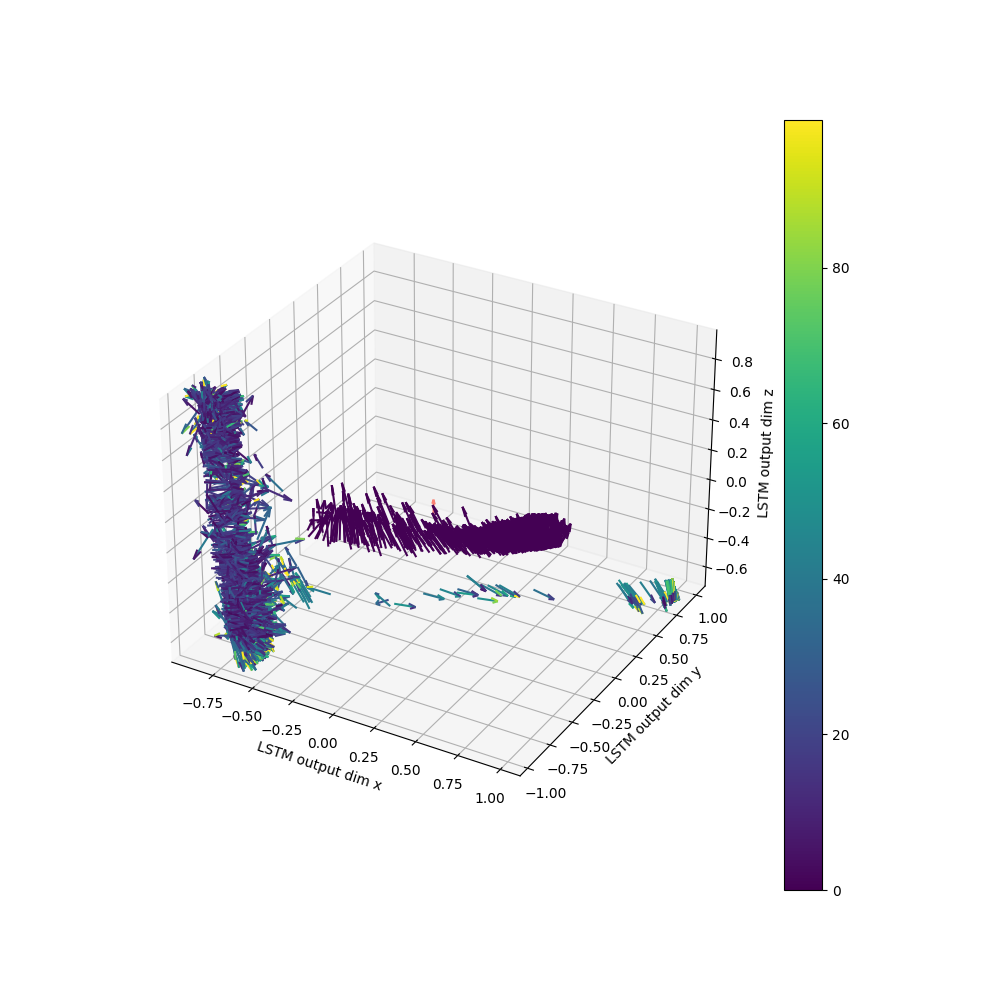

In [23]:
start,stop=0,175
negcolormap = cm.viridis
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
plt.close('all')
curlfig=plt.figure(figsize=(10,10))
curlax=curlfig.add_subplot(projection='3d')
curlax.quiver(0, 0, 0,
                  0 , 0, 1,
                  length=0.1,colors="#FA8072",normalize=True)
for i in range(start,stop,25):
    p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=nco[p.astype(int)]
    curlax.quiver(epochN_in[:,i:i+1,0], epochN_in[:,i:i+1,1], epochN_in[:,i:i+1,2],
                  epochN_curl[:,i:i+1,0] , epochN_curl[:,i:i+1,1], epochN_curl[:,i:i+1,2] ,
                  length=0.2,colors=cmap,normalize=True)
    curlax.set_xlabel('LSTM output dim x')
    curlax.set_ylabel('LSTM output dim y')
    curlax.set_zlabel('LSTM output dim z')
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
cbar=plt.colorbar(sm)
curlfig.set_label(f"Epoch {epoch}: Accy 0.495, Merge PROPN LSTM output datapoint vs Relative (Validation Set negative {samplesize} samples)")
plt.show()

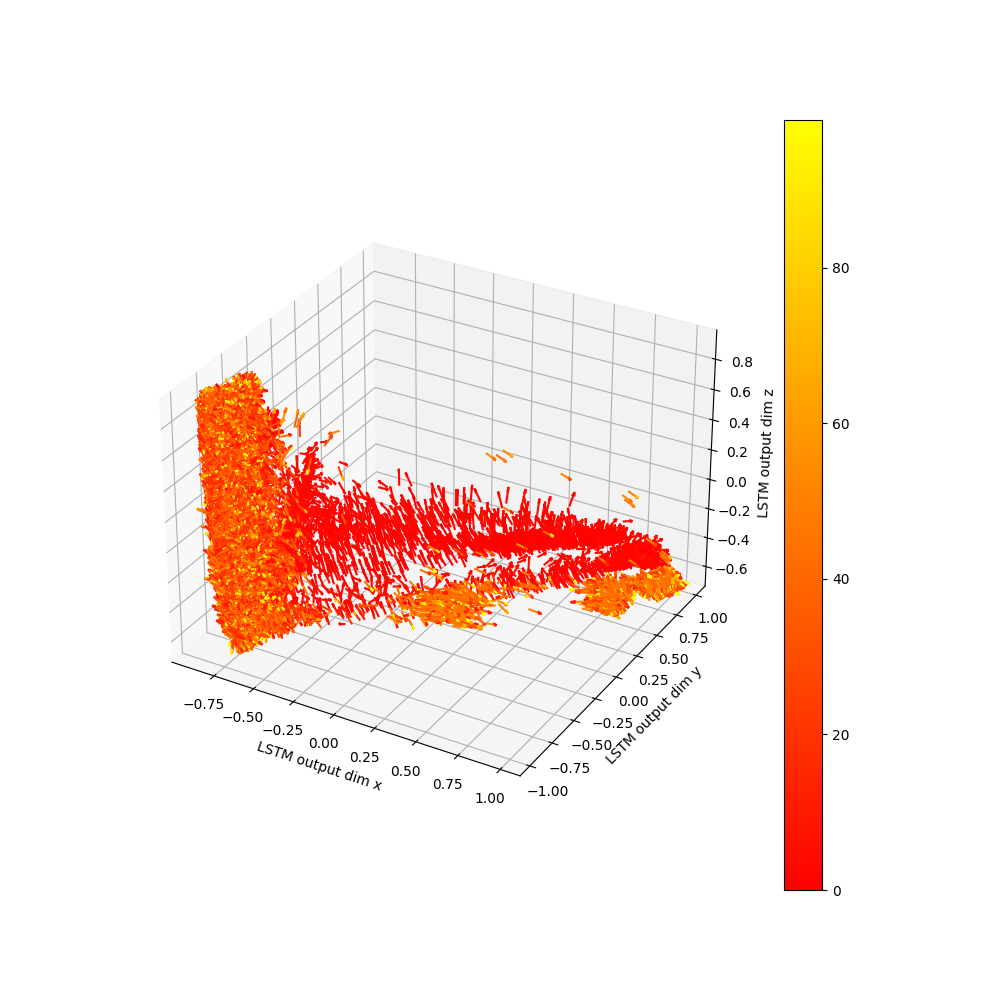

In [25]:
start,stop=0,175
poscolormap = cm.autumn
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
pco=poscolormap(norm(colors))
plt.close('all')
curlfig=plt.figure(figsize=(10,10))
curlax=curlfig.add_subplot(projection='3d')
for i in range(start,stop):
    p=np.ceil(i/test1.loc[psmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=pco[p.astype(int)]
    curlax.quiver(epochP_in[:,i:i+1,0], epochP_in[:,i:i+1,1], epochP_in[:,i:i+1,2],
                  epochP_curl[:,i:i+1,0] , epochP_curl[:,i:i+1,1], epochP_curl[:,i:i+1,2] ,
                 length=0.1, normalize=True,color=cmap)
    curlax.set_xlabel('LSTM output dim x')
    curlax.set_ylabel('LSTM output dim y')
    curlax.set_zlabel('LSTM output dim z')
sm = plt.cm.ScalarMappable(cmap=cm.autumn, norm=norm)
cbar=plt.colorbar(sm)
curlfig.set_label(f"Epoch {epoch}: Accy 0.495, Merge PROPN LSTM output datapoint vs Relative Position (Validation Set positive {samplesize} samples)")
plt.show()

/tmp/ipykernel_22322/1752737330.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


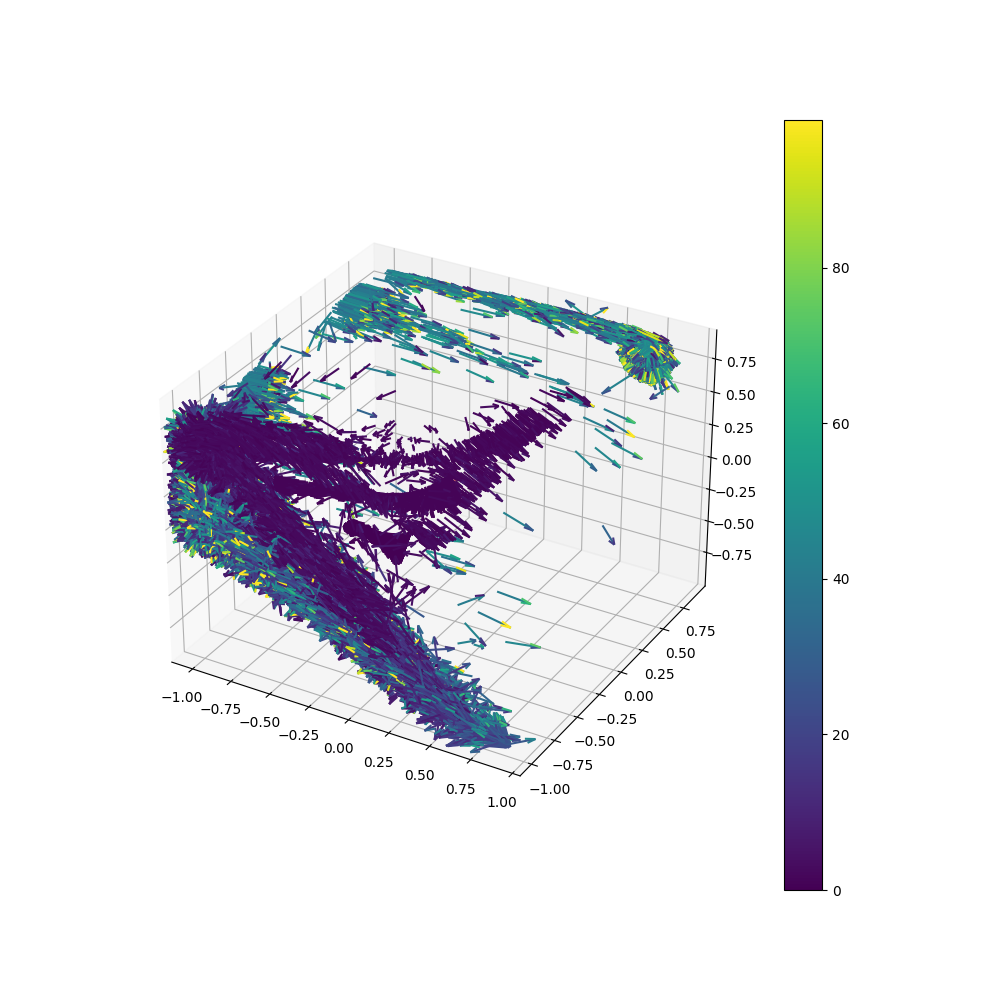

In [9]:
start,stop=0,175
negcolormap = cm.viridis
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
plt.close('all')
divfig=plt.figure(figsize=(10,10))
divax=divfig.add_subplot(projection='3d')
divax.quiver(0, 0, 0,
                  0 , 0, 1,
                  length=0.1,colors="#FA8072",normalize=True)
for i in range(start,stop):
    p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=nco[p.astype(int)]
    divax.quiver(epochN_in[:,i:i+1,0], epochN_in[:,i:i+1,1], epochN_in[:,i:i+1,2],
                  epochN_div[:,i:i+1,0] , epochN_div[:,i:i+1,1], epochN_div[:,i:i+1,2] ,
                  length=0.2,colors=cmap,normalize=True)
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
plt.colorbar(sm)
plt.show()